<a href="https://colab.research.google.com/github/kr7/ab/blob/main/02algoritmusok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kereső- és rendezőalgoritmusok**

Ebben a notebookban néhány széles körben ismert kereső- és rendezőalgoritmus futásidejét fogjuk tanulmányozni a bemenet hosszának függvényében. Bemenet hosszának azon lista hosszát fogjuk tekinteni, amiben keresünk vagy amit rendezünk.

In [1]:
# Importáljuk azokat a függvénykönyvtárak ill. függvényeket, amelyeket használni fogunk

import matplotlib.pyplot as plt

from time import time
from random import random

**Lineáris keresés**

In [2]:
# Az x elemet keressük az lst listában
def kereses(lst, x):
  for e in lst:
    if e == x:
      return True
  return False

In [3]:
kereses( [3, 5, 1, 7, 0], 3)

True

In [4]:
# Ez a függvény leméri, hogy egy n hosszú lista estében mennyi időt vesz igénybe
# az előbbi keresőalgoritmus futtatása

def teszt_kereses(n):
  lst = list(range(n))
  t0 = time()
  kereses(lst, 0.5)
  t1 = time()
  return t1-t0

In [5]:
# Lemérjük, hogy az 1 millió, 2 millió, ..., 20 millió elemszámú
# listában történő keresés mennyi ideig tart, majd ábrázoljuk az
# eredményeket
x1=[]
y1=[]
for n in range(1000000,20000001,1000000):
  t=[]
  for i in range(5):
    t1=teszt_kereses(n)
    t.append(t1)
  avg_t = sum(t)/len(t)
  print(f"{n} {avg_t}")
  x1.append(n)
  y1.append(avg_t)

1000000 0.10219898223876953
2000000 0.30309486389160156
3000000 0.6610464572906494
4000000 0.3464669704437256
5000000 0.37269182205200196
6000000 0.5571685314178467
7000000 0.49380006790161135
8000000 0.4530655860900879
9000000 0.5641277313232422
10000000 0.4874738216400146
11000000 0.5312574863433838
12000000 0.7412651062011719
13000000 0.6677936553955078
14000000 0.8152327537536621
15000000 0.9377217769622803
16000000 0.7730165958404541
17000000 1.0468289375305175
18000000 1.0305709362030029
19000000 0.9897830486297607
20000000 1.1039373397827148


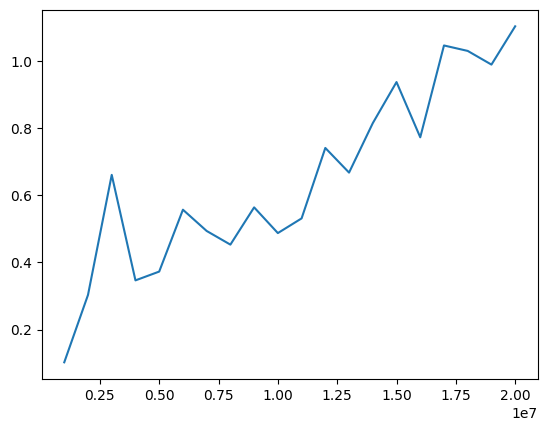

In [6]:
# a keresés futásideje a lista hosszának függvényében
plt.plot(x1,y1)
plt.show()

**Bináris keresés**

Vajon tudunk-e az előbbinél hatékonyabb keresőalgoritmust mutatni? A válasz a bináris keresés, de ez csak **rendezett listák** estében használható.

Lásd: https://hu.wikipedia.org/wiki/Bin%C3%A1ris_keres%C3%A9s#:~:text=A%20bin%C3%A1ris%20keres%C3%A9s%20vagy%20logaritmikus,logaritmusa%20vagy%20ahhoz%20nagyon%20k%C3%B6zeli.

In [7]:
# Az x elemet keressük az lst listában
def binaris_kereses(lst, x):
  kozep = len(lst) // 2 # lista középső elemének indexe
  if lst[kozep] == x:
    return True
  elif len(lst) == 1:
    return False
  elif lst[kozep] > x:
    return binaris_kereses(lst[:kozep], x)
  else:
    return binaris_kereses(lst[kozep:], x)

In [8]:
# Lemérjük, hogy egy n hosszúságú lista esetében mennyi ideig tart a keresés

def teszt_binaris_kereses(n):
  lst = list(range(n))
  t0 = time()
  binaris_kereses(lst, 0.5)
  t1 = time()
  return t1-t0

In [9]:
# Lemérjük, hogy 1 millió, 2 millió, ... 20 millió elemszámú listák
# esetében mennyi ideig tart a keresés, majd diagramon ábrázoljuk az eredmények

x2=[]
y2=[]
for n in range(1000000,20000001,1000000):
  t=[]
  for i in range(5):
    t1=teszt_binaris_kereses(n)
    t.append(t1)
  avg_t = sum(t)/len(t)
  print(f"{n} {avg_t}")
  x2.append(n)
  y2.append(avg_t)

1000000 0.008420276641845702
2000000 0.016710186004638673
3000000 0.029356861114501955
4000000 0.05600838661193848
5000000 0.05019268989562988
6000000 0.06371507644653321
7000000 0.08159680366516113
8000000 0.10567994117736816
9000000 0.10053215026855469
10000000 0.11028070449829101
11000000 0.13746910095214843
12000000 0.16436185836791992
13000000 0.17177872657775878
14000000 0.22514791488647462
15000000 0.17709274291992189
16000000 0.17158312797546388
17000000 0.20661611557006837
18000000 0.21562571525573732
19000000 0.2747199058532715
20000000 0.25139284133911133


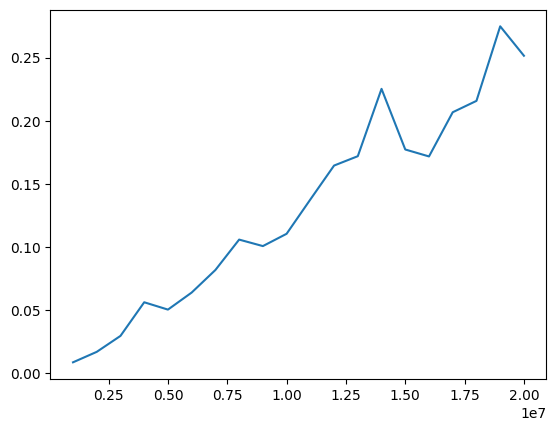

In [10]:
import matplotlib.pyplot as plt
plt.plot(x2,y2)
plt.show()

Érdekesebb a kétféle keresés futásidejét egy közös diagramon ábrázolni

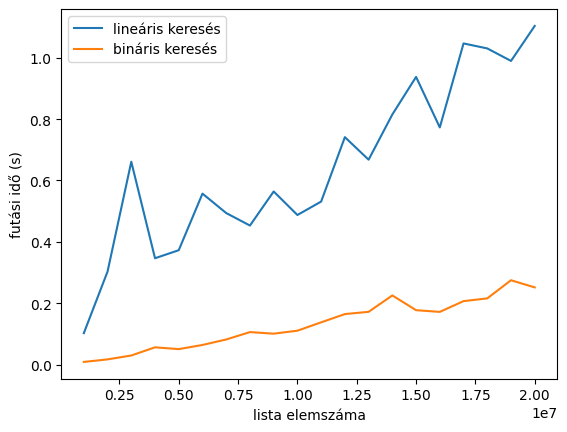

In [11]:
plt.plot(x1,y1, label = "lineáris keresés")
plt.plot(x2,y2, label = "bináris keresés")
plt.ylabel("futási idő (s)")
plt.xlabel("lista elemszáma")
plt.legend()
plt.show()

**Buborékrendezés**

Az algoritumus leírása: https://hu.wikipedia.org/wiki/Bubor%C3%A9krendez%C3%A9s

Buborékrendezés eltáncolva: https://www.youtube.com/watch?v=semGJAJ7i74

In [12]:
def csere(lst, i, j):
  tmp = lst[i]
  lst[i] = lst[j]
  lst[j] = tmp

# Az lst lista elemeit kívánjuk növekvő sorba rendezni
def buborekrendezes(lst):
  for i in range(len(lst)-1):
    for j in range(len(lst)-1):
      if lst[j] > lst[j+1]:
        csere(lst, j, j+1)

In [13]:
# Lemérjük, hogy egy n elemszámú lista rendezése mennyi ideig tart

def teszt_buborekrendezes(n):
  lst = []
  for i in range(n):
    lst.append(random())

  t0 = time()
  buborekrendezes(lst)
  t1 = time()
  return t1-t0

In [14]:
# Lemérjük, hogy 1000, 2000, ..., 24000 elemszámú listák rendezése
# mennyi időt vesz igénybe, majd ábrázoljuk az eredményeket

x3=[]
y3=[]
for n in range(1000,25000,1000):
  t=[]
  for i in range(5):
    t1=teszt_buborekrendezes(n)
    t.append(t1)
  avg_t = sum(t)/len(t)
  print(f"{n} {avg_t}")
  x3.append(n)
  y3.append(avg_t)

1000 0.09676704406738282
2000 0.3637230396270752
3000 0.8163926601409912
4000 1.6643355369567872
5000 2.4727970123291017
6000 3.4984437465667724
7000 4.846963787078858
8000 6.584549856185913
9000 8.17110342979431
10000 10.140893936157227
11000 12.175114488601684
12000 14.399978637695312
13000 17.693949508666993
14000 19.742200231552125
15000 22.665502500534057
16000 26.054352521896362
17000 29.76324920654297
18000 33.43885817527771
19000 37.53424587249756
20000 41.557462215423584
21000 46.70367565155029
22000 50.49245553016662
23000 55.79708952903748
24000 61.072088432312015


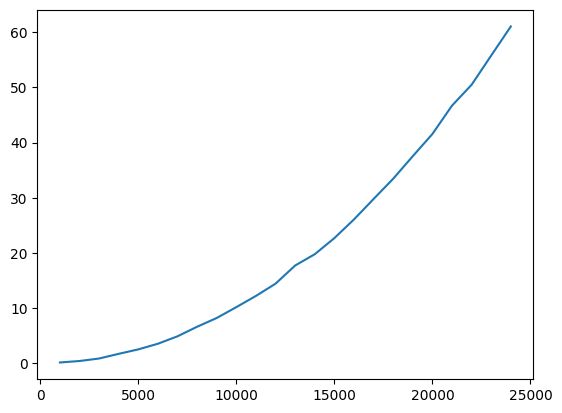

In [15]:
import matplotlib.pyplot as plt
plt.plot(x3,y3)
plt.show()

**Összefésüléses rendezés**

Lásd: https://hu.wikipedia.org/wiki/%C3%96sszef%C3%A9s%C3%BCl%C3%A9ses_rendez%C3%A9s

In [16]:
# Az lst listát kívánjuk növekvő sorrendbe rendezni

def osszefesuleses_rendezes(lst):
  if len(lst) == 1:
    return lst
  else:
    kozep = len(lst) // 2
    balra, jobbra = lst[:kozep], lst[kozep:]
    balra = osszefesuleses_rendezes(balra)
    jobbra = osszefesuleses_rendezes(jobbra)
    lst = []
    i, j = 0,0
    while i < len(balra) and j < len(jobbra):
      if balra[i] < jobbra[j]:
        lst.append(balra[i])
        i += 1
      else:
        lst.append(jobbra[j])
        j += 1
    lst += balra[i:]
    lst += jobbra[j:]
    return lst

In [17]:
# Az előbbiekhez hasonlóan lemérjük egy n hosszúságú lista rendezéséhez
# szükséges időt

def teszt_osszefesuleses_rendezes(n):
  lst = []
  for i in range(n):
    lst.append(random())

  t0 = time()
  osszefesuleses_rendezes(lst)
  t1 = time()
  return t1-t0

In [18]:
# Lemérjük, hogy 1000, 2000, ..., 24000 elemszámú listák rendezése meddig tart,
# majd ábrázoljuk az eredményeket
x4=[]
y4=[]
for n in range(1000,25000,1000):
  t=[]
  for i in range(5):
    t1=teszt_osszefesuleses_rendezes(n)
    t.append(t1)
  avg_t = sum(t)/len(t)
  print(f"{n} {avg_t}")
  x4.append(n)
  y4.append(avg_t)

1000 0.002529621124267578
2000 0.004700469970703125
3000 0.008165931701660157
4000 0.008918237686157227
5000 0.010943222045898437
6000 0.014339447021484375
7000 0.01871633529663086
8000 0.019475126266479494
9000 0.02227320671081543
10000 0.02700324058532715
11000 0.02786102294921875
12000 0.029435396194458008
13000 0.033554363250732425
14000 0.03604254722595215
15000 0.03802647590637207
16000 0.043668174743652345
17000 0.04611043930053711
18000 0.047914648056030275
19000 0.04969496726989746
20000 0.056365156173706056
21000 0.05702319145202637
22000 0.05975408554077148
23000 0.06130881309509277
24000 0.0692169189453125


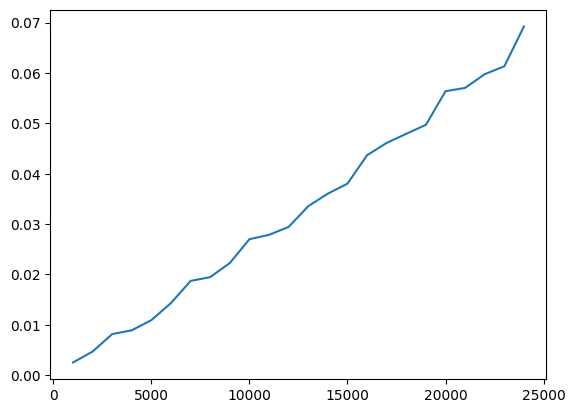

In [19]:
import matplotlib.pyplot as plt
plt.plot(x4,y4)
plt.show()

Ismét érdekes a két rendezőalgoritmus futásidejét közös diagramom ábrázolni

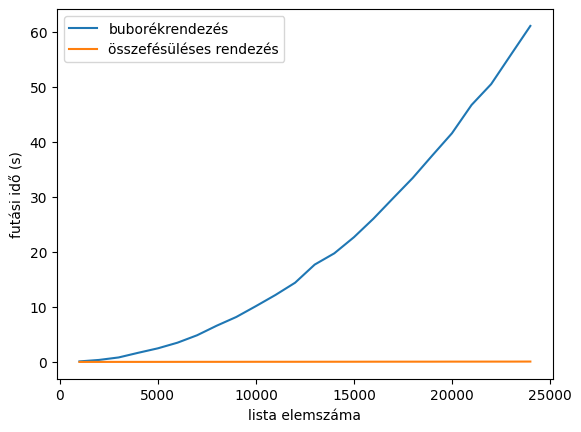

In [20]:
plt.plot(x3,y3, label = "buborékrendezés")
plt.plot(x4,y4, label = "összefésüléses rendezés")
plt.ylabel("futási idő (s)")
plt.xlabel("lista elemszáma")
plt.legend()
plt.show()